In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'resistance'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：电阻因子(resistence)   
定义1：窗口周期delta_t内收益r或价格p的最大最小值之差的绝对值
$$
factor = |\max(r_1,r_2,\cdots,r_t) - \min(r_1,r_2,\cdots,r_t)|
$$
定义2：窗口周期delta_t内,收益r或价格p在t时刻的值到窗口周期内的最大值的比值，即回撤
$$
factor = r_t/\max(r_1,r_2,\cdots,r_t) - 1
$$
定义3：窗口周期delta_t内,收益r或价格p的标准差
$$
factor = \sigma(r_1,r_2,\cdots,r_t)
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : resistance
fields : ['close']
other_dIepend_factors : []
calc_params : {'resistance_type': 'std', 'resistance_type_list': ['abs_max_min', 'drawdown', 'std'], 'delta_period': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [0.00010672615408699609, 4.624629461093796]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

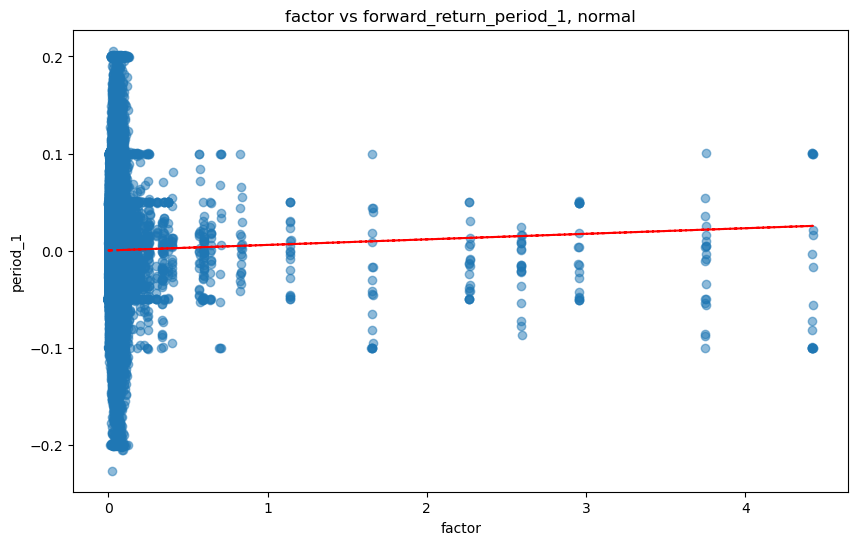

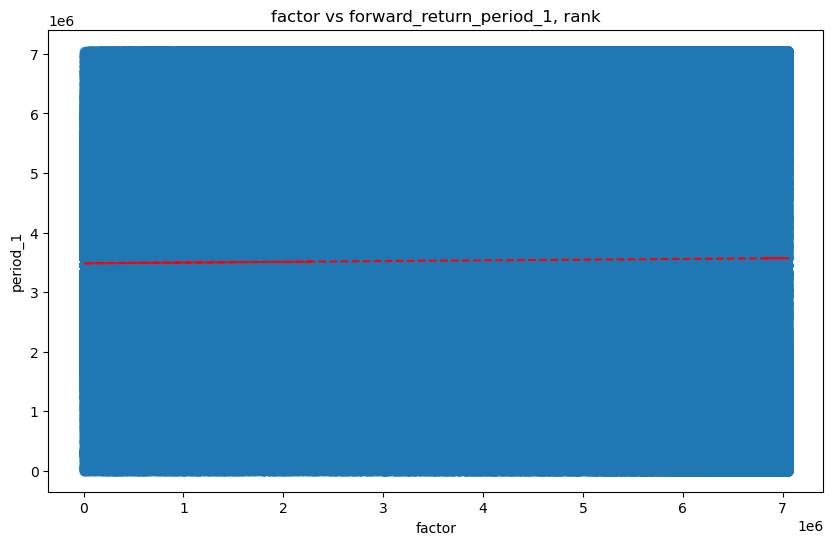

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

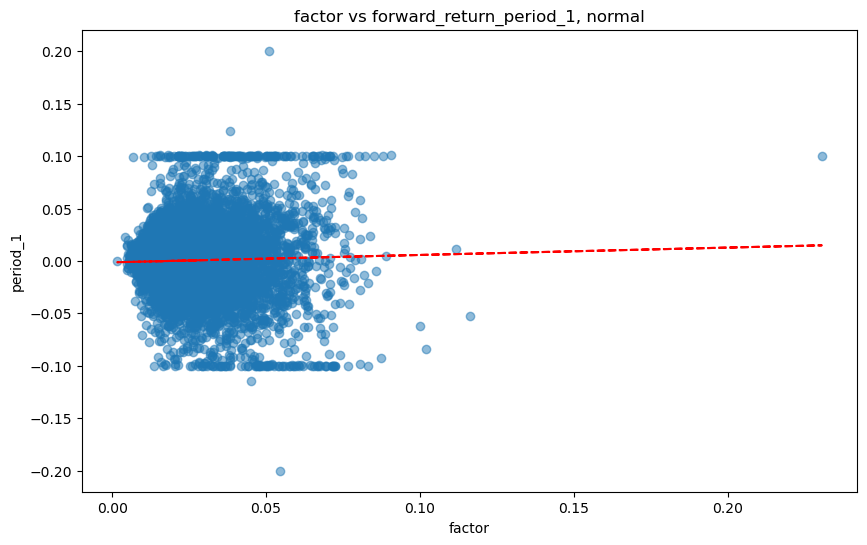

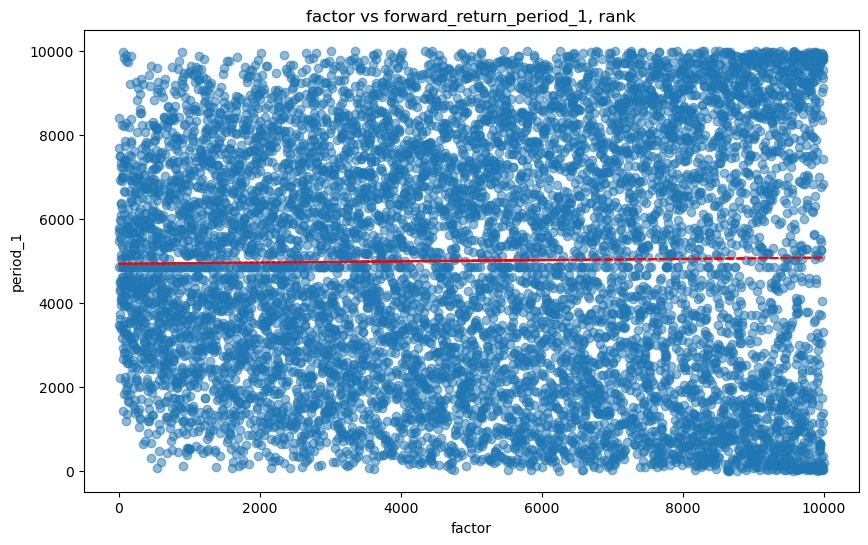

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

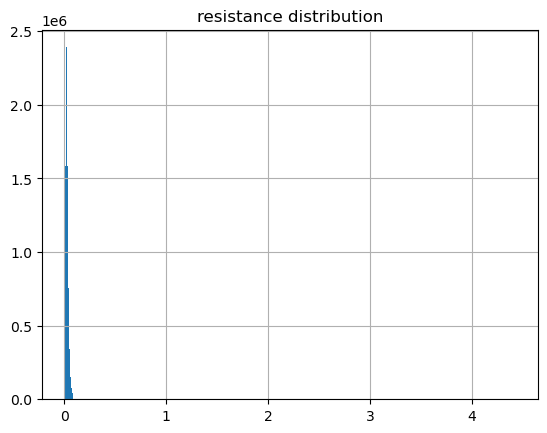

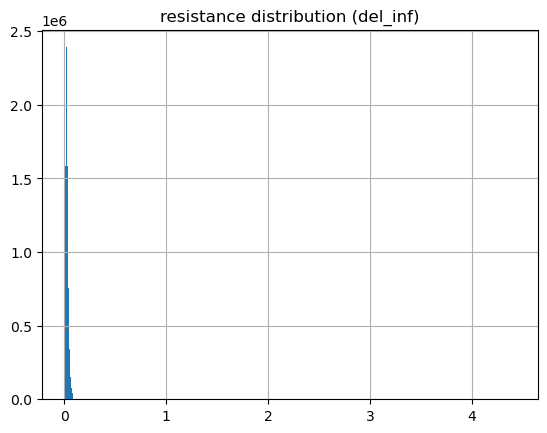

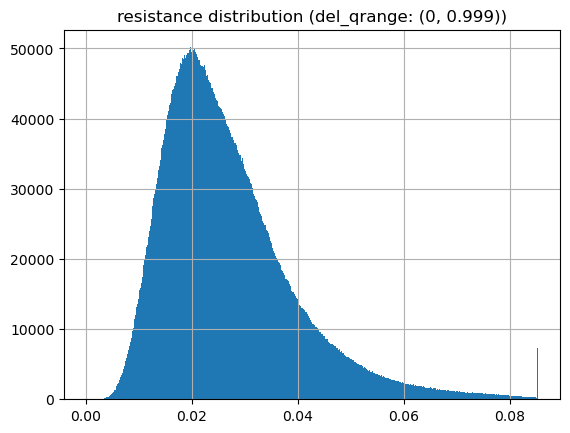

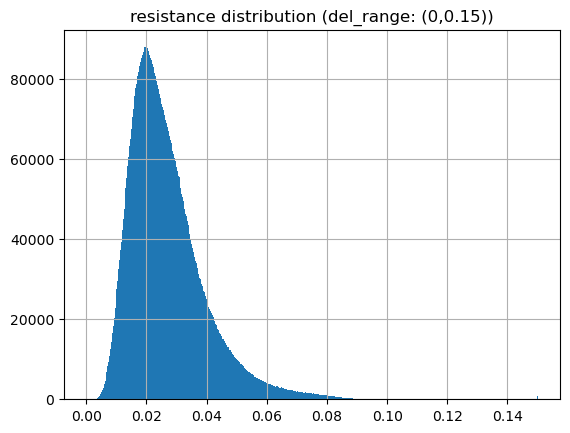

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0,0.999))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(0,0.15))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean          0.002397 -0.004921 -0.009595 -0.015151 -0.020184   
norm_ic_std           0.142009  0.141724  0.139371  0.135505   0.13223   
norm_ic_0.02_percent  0.870606  0.878459  0.877337  0.876215   0.86537   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               0.016877  -0.03472 -0.068845 -0.111809  -0.15264   
norm_abs_ic           0.003493  0.004638   0.00534  0.007321  0.009358   
rank_ic_mean          -0.03194 -0.038144 -0.043328 -0.051326  -0.05787   
rank_ic_std           0.165911  0.165418  0.165315   0.16398  0.161635   
rank_ic_0.02_percent  0.914361  0.904637  0.913239  0.913987  0.905011   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir              -0.192515  -0.23059 -0.262096 -0.313004 -0.358028   
rank_abs_ic           0.012214  0.007039  0.008658  0.009312  0.011532   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

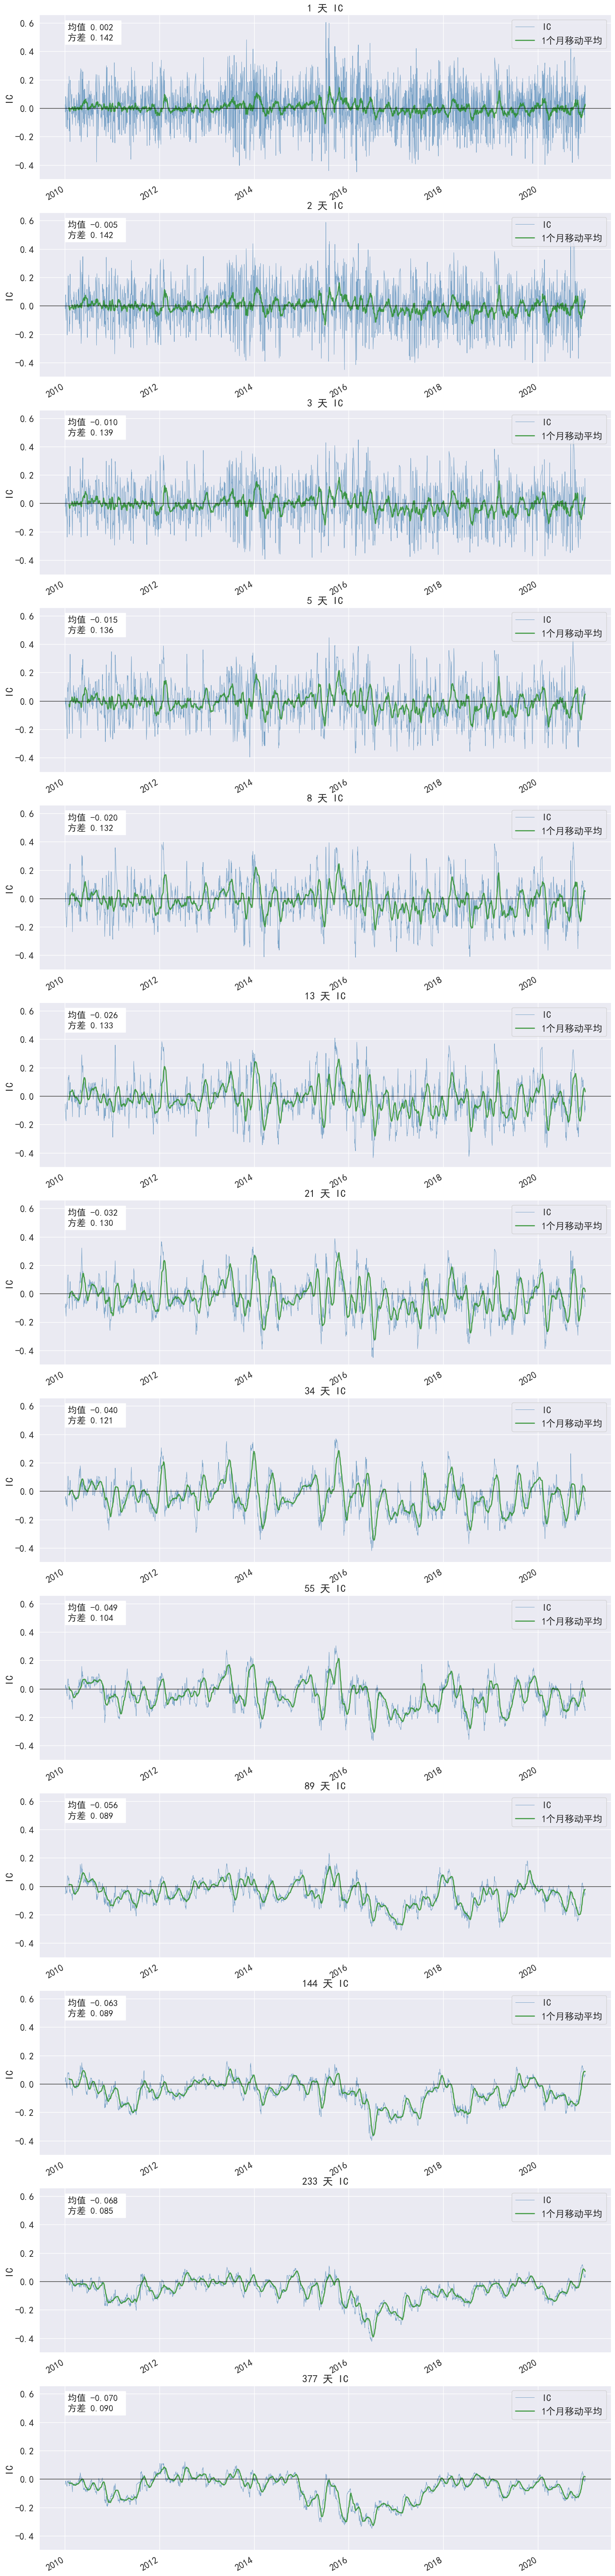

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

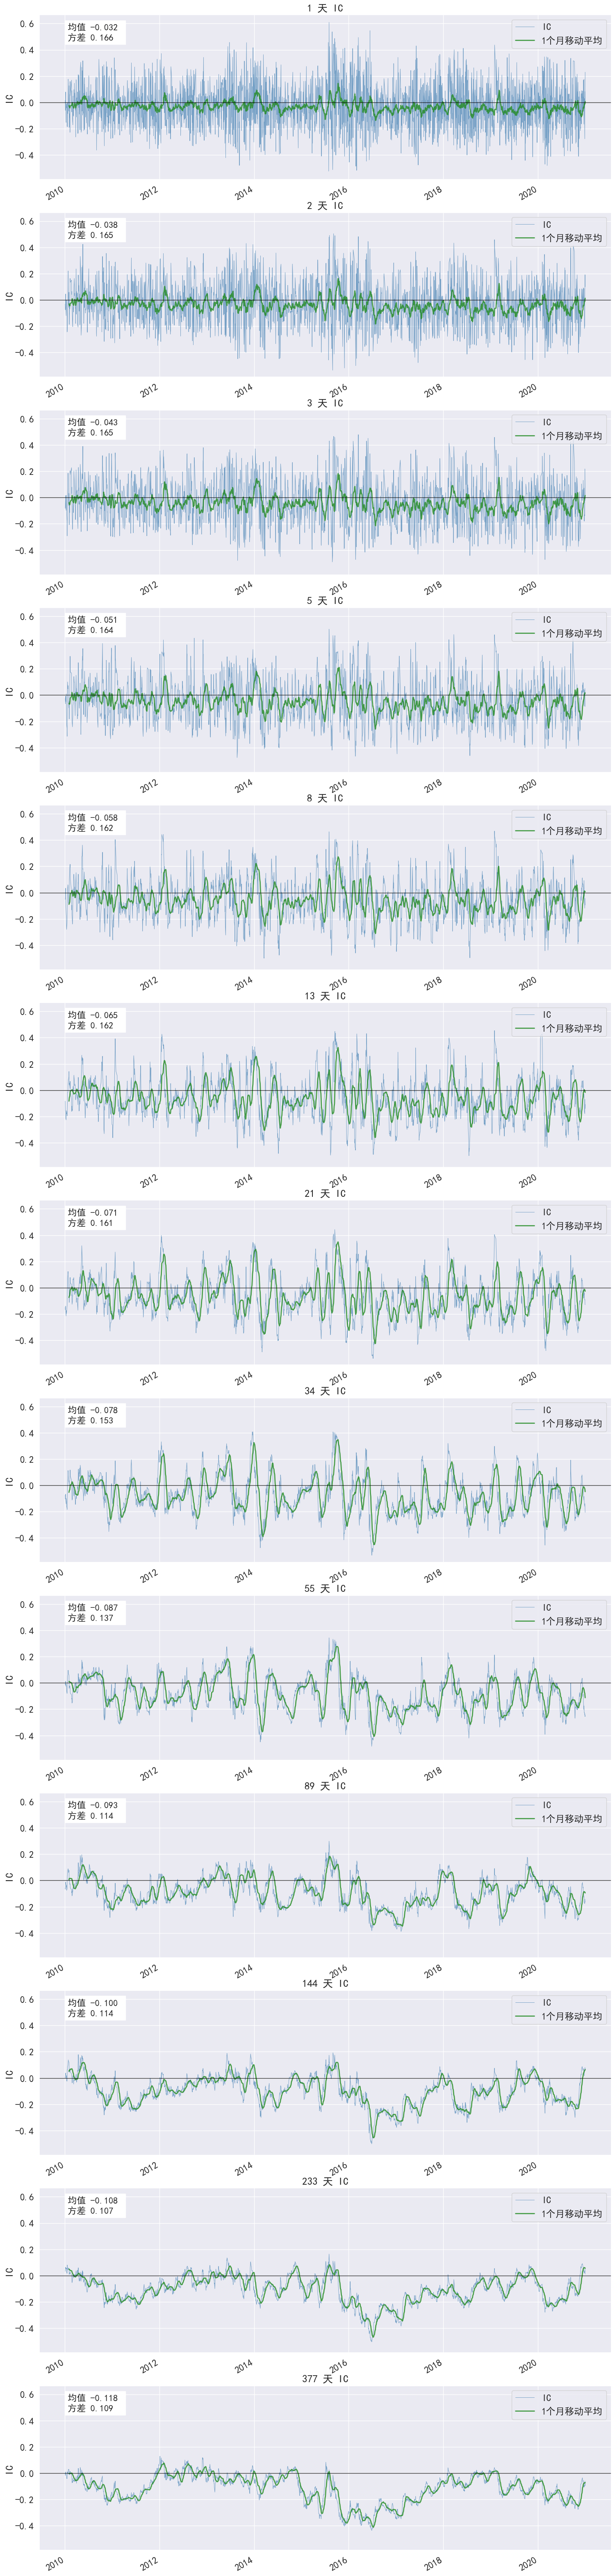

In [13]:
zy_fa.plot_rank_ic_ts()